# Factorization

We can think about modern analytics as trying to learn low-dimensional summaries from some high dimensional input information to make decisions. Our goal is to break the expectation for each high dimensional set of input data into the sum of a small number if factors by minimizing out-of-sample deviance.

## Clustering

Cluster analysis is used to group similar observations into groups. Th K-means clustering algorithm works by (look to page 186 in textbook)
1. Estimate k cluster means based on $n_k$ observations within a cluster
### \begin{align} \hat{\mu}_k = \bar{x}_k = \frac{1}{n_k} \sum_{for-all-x_i-in-cluster-k} x_i \end{align}
2. For each observation $x_i$, update its cluster assignment such that
### \begin{align} k_i = {argmin}_i \sum_j (x_{ij} - \hat{\mu}_{kj})^2 \end{align}


### To illustrate K-means clustering, we will look at the protein.csv dataset to examine protein consumption for 25 European countries in grams per person per day.

In [6]:
#Set the working directory to the specific location of the files on your computer
#note: In this case, the working directory was set for my computer
setwd("/Users/Brandon/Harding_ML_Class")

#set graphical parameters (this is only needed for jupyter notebooks)
options(repr.plot.width = 10, repr.plot.height = 5)

In [1]:
### *** European Protein Consumption, in grams/person-day *** ###
food <- read.csv("protein.csv", row.names=1) # 1st column is country name

## scale the data
xfood <- scale(food)

In [5]:
#View structure of the dataset
str(food)

'data.frame':	25 obs. of  9 variables:
 $ RedMeat  : num  10.1 8.9 13.5 7.8 9.7 10.6 8.4 9.5 18 10.2 ...
 $ WhiteMeat: num  1.4 14 9.3 6 11.4 10.8 11.6 4.9 9.9 3 ...
 $ Eggs     : num  0.5 4.3 4.1 1.6 2.8 3.7 3.7 2.7 3.3 2.8 ...
 $ Milk     : num  8.9 19.9 17.5 8.3 12.5 25 11.1 33.7 19.5 17.6 ...
 $ Fish     : num  0.2 2.1 4.5 1.2 2 9.9 5.4 5.8 5.7 5.9 ...
 $ Cereals  : num  42.3 28 26.6 56.7 34.3 21.9 24.6 26.3 28.1 41.7 ...
 $ Starch   : num  0.6 3.6 5.7 1.1 5 4.8 6.5 5.1 4.8 2.2 ...
 $ Nuts     : num  5.5 1.3 2.1 3.7 1.1 0.7 0.8 1 2.4 7.8 ...
 $ Fr.Veg   : num  1.7 4.3 4 4.2 4 2.4 3.6 1.4 6.5 6.5 ...


In [2]:
#Perform K-means
grpMeat <- kmeans(xfood
                  ,centers=3 #Number of clusters to create
                  ,nstart=10 #Number of times to iterate the clustering procedures
                 )

#View cluster means
grpMeat

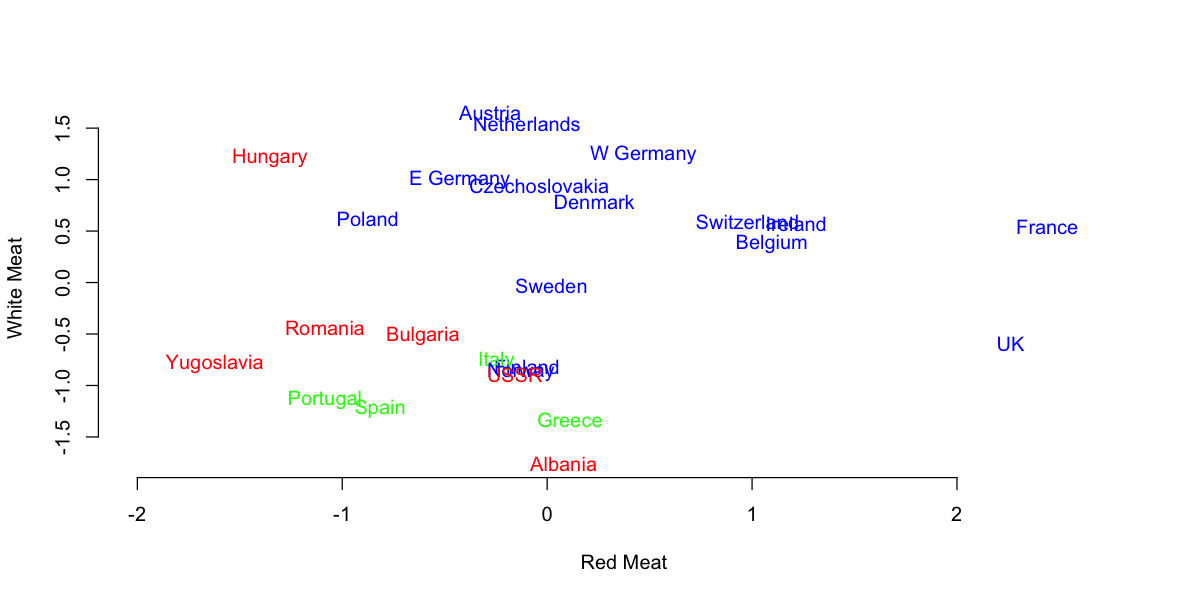

In [7]:
#Plot 3 mean clustering of countries protein consumption terms of means of red meat versus white meat
# note: color of a country designates membership of that cluster
plot(xfood[,"RedMeat"], xfood[,"WhiteMeat"], xlim=c(-2,2.75), 
    type="n", xlab="Red Meat", ylab="White Meat", bty="n")
text(xfood[,"RedMeat"], xfood[,"WhiteMeat"], labels=rownames(food), 
    col=rainbow(3)[grpMeat$cluster])

In [8]:
#Perform clustering with 7 means
grpProtein <- kmeans(xfood, centers=7, nstart=50) ## change the number of centers to see what happens.
grpProtein

K-means clustering with 7 clusters of sizes 5, 4, 2, 4, 4, 4, 2

Cluster means:
       RedMeat  WhiteMeat        Eggs       Milk       Fish    Cereals
1  1.599006499  0.2988565  0.93413079  0.6091128 -0.1422470 -0.5948180
2 -0.807569986 -0.8719354 -1.55330561 -1.0783324 -1.0386379  1.7200335
3 -0.068119111 -1.0411250 -0.07694947 -0.2057585  0.1075669  0.6380079
4 -0.083057512  1.3613671  0.88491892  0.1671964 -0.2745013 -0.8062116
5  0.006572897 -0.2290150  0.19147892  1.3458748  1.1582546 -0.8722721
6 -0.605901566  0.4748136 -0.27827076 -0.3640885 -0.6492221  0.5719474
7 -0.949484801 -1.1764767 -0.74802044 -1.4583242  1.8562639 -0.3779572
      Starch        Nuts     Fr.Veg
1  0.3451473 -0.34849486  0.1020010
2 -1.4234267  0.99613126 -0.6436044
3 -1.3010340  1.49973655  1.3659270
4  0.3665660 -0.86720831 -0.1585451
5  0.1676780 -0.95533923 -1.1148048
6  0.6419495 -0.04884971  0.1602082
7  0.9326321  1.12203258  1.8925628

Clustering vector:
       Albania        Austria        Belgium

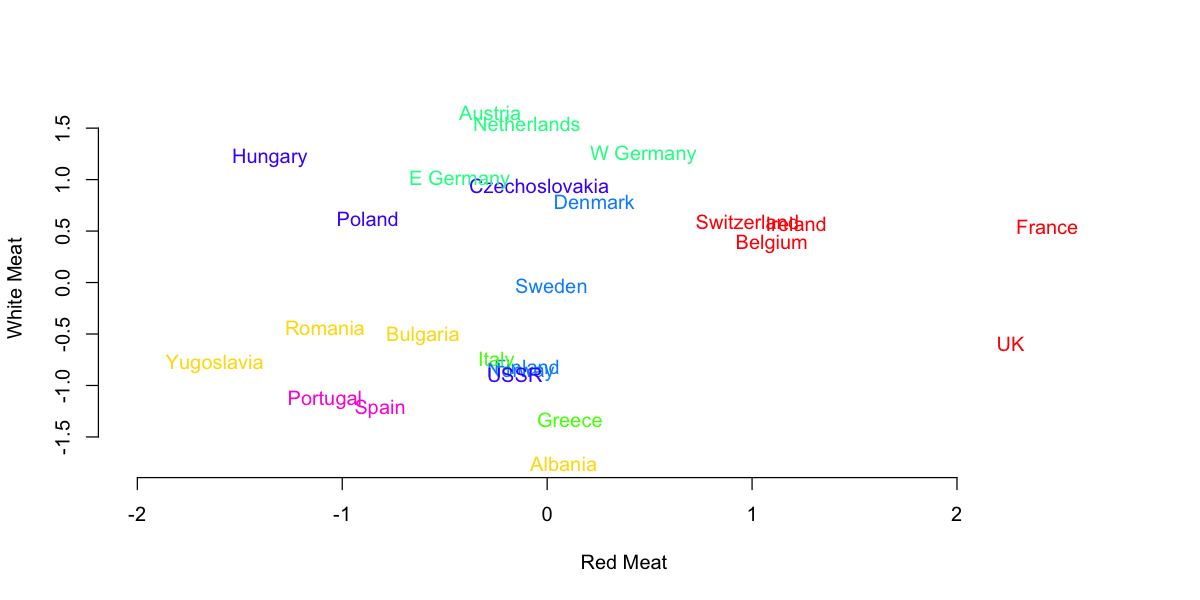

In [10]:
#Plot 7 mean clustering of countries protein consumption terms of means of red meat versus white meat
plot(xfood[,"RedMeat"], xfood[,"WhiteMeat"], xlim=c(-2,2.75), 
    type="n", xlab="Red Meat", ylab="White Meat", bty="n")
text(xfood[,"RedMeat"], xfood[,"WhiteMeat"], labels=rownames(food), 
    col=rainbow(7)[grpProtein$cluster]) ## col is all that differs from first plot

## Factor Models and PCA

Goal is to build x as a function of unknown foctors where

\begin{align} \mathbb{E}[x_i] = \phi_i v_{i1} + ... + \phi_K v_{iK} \end{align}

or broken down to $x_{ij}$'s

\begin{align} \mathbb{E}[x_ij] = \phi_{ji} v_{i1} + ... + \phi_{jK} v_{iK} \end{align}
for j=1...p

### Principal Component Analysis

Essentially, this algorithm is seeking to transform the input dimensions of some matrix X to a new matrix in which the first dimension contains as much possible variance in the data, and each subsequent dimension explains less and less. The textbook definition for th ealgorithm is explained on pg193.

### We will use the food dataset from above to demonstrate PCA.

In [11]:
#Import the food dataset
food <- read.csv("protein.csv", row.names=1)

In [12]:
#perform PCA
pcfood <- prcomp(food, scale=TRUE #scale input data)

#View results rounded to two decimal places
round(pcfood$rotation, 1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RedMeat,-0.3,-0.1,-0.3,-0.6,0.3,-0.5,0.2,0.0,0.2
WhiteMeat,-0.3,-0.2,0.6,0.0,-0.3,-0.1,0.0,0.0,0.6
Eggs,-0.4,0.0,0.2,-0.3,0.1,0.4,-0.4,-0.5,-0.3
Milk,-0.4,-0.2,-0.4,0.0,-0.2,0.6,0.5,0.1,0.2
Fish,-0.1,0.6,-0.3,0.2,-0.3,-0.1,-0.1,-0.4,0.3
Cereals,0.4,-0.2,0.1,0.0,0.2,0.1,0.4,-0.7,0.2
Starch,-0.3,0.4,0.2,0.3,0.7,0.1,0.2,0.1,0.1
Nuts,0.4,0.1,-0.1,-0.3,0.2,0.4,-0.4,0.2,0.5
Fr.Veg,0.1,0.5,0.4,-0.5,-0.2,0.1,0.4,0.1,-0.2


In [13]:
#To get the actual transformed data use the predict function

#Show PCA transformation for France
round( predict(pcfood, newdata=food["France",]),2)

#For all of the data (we will view the first few rows)
head( round(zfood <- predict(pcfood),1)) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
France,-1.49,0.79,0,-1.96,0.25,-0.9,0.95,-0.02,0.54


In [14]:
head( round(zfood <- predict(pcfood),1)) 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Albania,3.5,-1.6,-1.8,-0.2,0.0,-1.0,-0.5,0.8,-0.1
Austria,-1.4,-1.0,1.3,-0.2,-0.9,0.2,-0.2,-0.3,-0.2
Belgium,-1.6,0.2,0.2,-0.5,0.8,-0.3,-0.2,-0.2,0.0
Bulgaria,3.1,-1.3,0.2,-0.2,-0.5,-0.7,0.5,-0.8,-0.3
Czechoslovakia,-0.4,-0.6,1.2,0.5,0.3,-0.8,0.3,0.0,-0.1
Denmark,-2.4,0.3,-0.8,1.0,-0.8,-0.2,-0.2,-0.6,0.5


In [18]:
#NOTE: predict is simply applying the phi variable rotations shown in the equations above
z <- scale(food)%*%pcfood$rotation
head(round(z,1))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Albania,3.5,-1.6,-1.8,-0.2,0.0,-1.0,-0.5,0.8,-0.1
Austria,-1.4,-1.0,1.3,-0.2,-0.9,0.2,-0.2,-0.3,-0.2
Belgium,-1.6,0.2,0.2,-0.5,0.8,-0.3,-0.2,-0.2,0.0
Bulgaria,3.1,-1.3,0.2,-0.2,-0.5,-0.7,0.5,-0.8,-0.3
Czechoslovakia,-0.4,-0.6,1.2,0.5,0.3,-0.8,0.3,0.0,-0.1
Denmark,-2.4,0.3,-0.8,1.0,-0.8,-0.2,-0.2,-0.6,0.5


#### Interpretation of the principal components (PC's) can come from a bottom up or top down approach.

#### 1) Bottom Up: Look at the big resulting rotation scores and come up with a understanding.

In [ ]:
## implies rotations are on scale of standard deviations if scale=TRUE
## looks like PC1 is an 'average diet', PC2 is iberian
t( round(pcfood$rotation[,1:2],2) )

#### 2) Top Down: Look at the fitted transformed input matrix and develop a narrative for the principal components.

In [19]:
## do some k-means, for comparison
grpProtein <- kmeans(scale(food), centers=7, nstart=20)

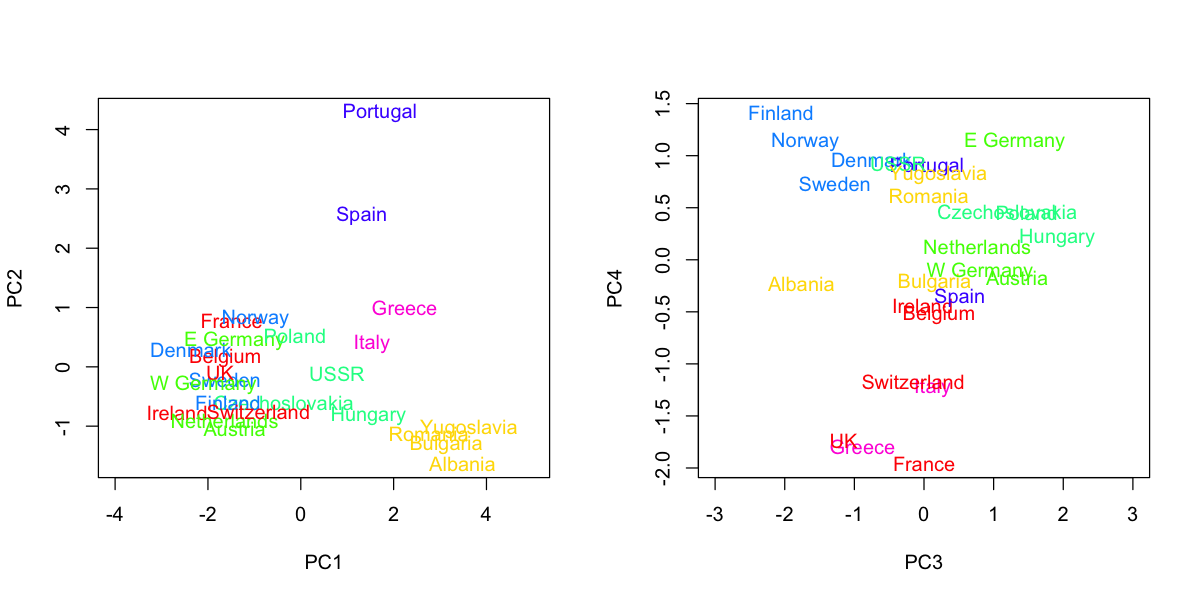

In [21]:
## how do the PCs look?
par(mfrow=c(1,2))
plot(zfood[,1:2], type="n", xlim=c(-4,5))
text(x=zfood[,1], y=zfood[,2], labels=rownames(food), col=rainbow(7)[grpProtein$cluster])
plot(zfood[,3:4], type="n", xlim=c(-3,3))
text(x=zfood[,3], y=zfood[,4], labels=rownames(food), col=rainbow(7)[grpProtein$cluster])

## NOTE: PC1 could be western versus eastern and PC2 could represent an Iberian diet since it distinguishes
##       countries Spain and Portugal

#### For determining the optimal number of PC's to keep, look for when the variance drops off.

In [ ]:
## summary puts these scree plots on a more intuitive scale: 
    ## proportion of variation explained.
summary(pcfood)

In [ ]:
#Plot the variances
plot(pcfood, main="")
mtext(side=1, "European Protein Principle Components",  line=1, font=2)

### To demonstrate another example of PCA, we will look at the congressional record for roll-call-votes. 

The data consists of 445 voting members and their vote on 1647 questions (-1 nea and +1 yea). If we feel that congressional members are divided along a partisan line, PCA should be able to extract this from the voting data. 

In [22]:
#Import data
votes <- read.csv("rollcall-votes.csv")
legis <- read.csv("rollcall-members.csv")

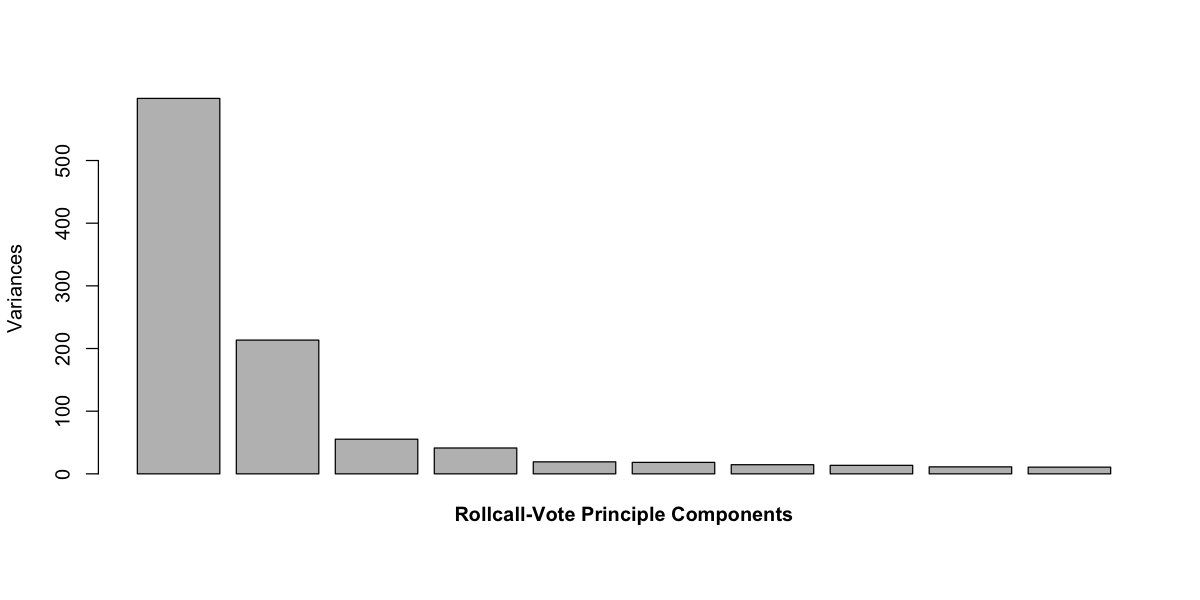

In [23]:
#Perform PCA
pcavote <- prcomp(votes, scale=TRUE)

#Plot the variances of the resulti=ng principal components
plot(pcavote, main="")
mtext(side=1, "Rollcall-Vote Principle Components",  line=1, font=2)

#### Notice that while in the plot above, PC1 absorbs most of the variance, PC2 still can explain some variation in the data. Let's look at a plot of the congress members against PC1 and PC2.

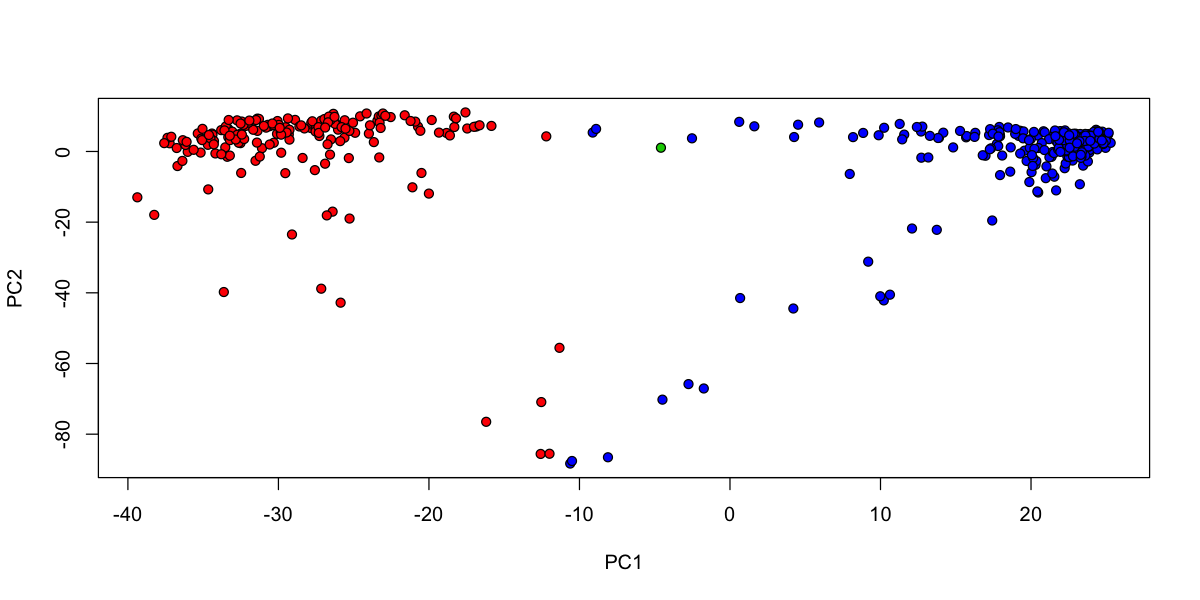

In [24]:
#Plot congress members against first two PC's with color being their actual party
votepc <- predict(pcavote) # scale(votes)%*%pcavote$rotation
plot(votepc[,1:2], pch=21, bg=(4:2)[legis$party], main="")

#### The chart above expresses our top down view, a clear distinction of party lines across PC1, yet we still don't understand what PC2 means. Thus, let's change to a bottom up approach by looking a plot of the PC1 transformations for congress members.

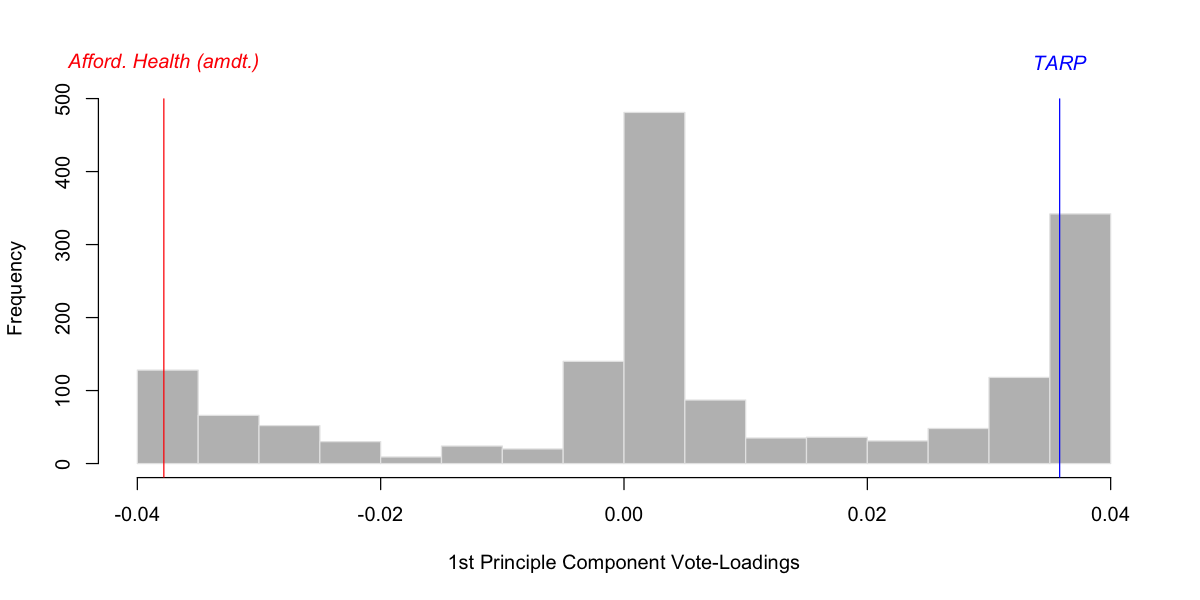

In [26]:
##Plot the PC1 loadngs

#Look at the loadings
loadings <- pcavote$rotation[,1:2]

##Construct plot
# note: the 1st is traditional left-right
hist(loadings[,1], main="", xlab="1st Principle Component Vote-Loadings",
     col=8, border=grey(.9))
abline(v=loadings[884,1], col=2)
text(x=loadings[884,1], y=550, "Afford. Health (amdt.)", xpd=TRUE, col=2, font=3)
abline(v=loadings[25,1], col=4)
text(x=loadings[25,1], y=550, "TARP", xpd=TRUE, col=4, font=3)


#### The chart above shows that for controversial bills such as those mentioned, some congress members voted against their party lines. This explains all of the variation for PC1. For PC2 look at the second factor loadings.

#### We will find that PC2 represents attendance as bills that all politicians regardless of party will vote for, congress members who were absent voted 0 and that score translated into PC2.

In [27]:
## trying to interpret the 2nd factor
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

## attendance! Members with highest number of absences
sort(rowSums(votes==0), decreasing=TRUE)[1:5]

Vote.1146   Vote.658  Vote.1090  Vote.1104  Vote.1149 
0.05605862 0.05461947 0.05300806 0.05168382 0.05155729

SOLIS (D CA-32) GILLIBRAND (D NY-20)       REED (R NY-29) 
                1628                 1619                 1562 
   STUTZMAN (R IN-3)      PELOSI (D CA-8) 
                1557                 1541

## Principal Component Regression (PCR)

When the principal components lack straightforward interpretation, the principal components can be used as inputs to a regression. Thus, instead of regressing y onto x, we can use a lower dimension set of principal components as covariates.

A common approach is to use the Principal Components [lasso] Regression
1. Fit a PCA on the input matrix x to get principal components in matrix v
2. Fit a lasso regression of y on v or y on x and v

#### We will work through an example of a NBC survey response to showcase the use of PCR lasso  regression. Our goal will be to see if we can predict viewer interest from pilot show surveys. Look to PCR_bbc.R for the script.

## Partial least Squares

Unfortunately when using PCR, it is only effective when y is related to the sources of variation in x. Thus, we can make use of Marginal Regression and Partial Least Squares when thi ssituation occurs.

### Marginal Regression

This type of regression constructs a single factor that is connected both to y and to a dominant direction of variation in x. The steps of the algorithm are to

1. Find a set of $\phi = [\phi_1 ...  \phi_p] where \phi_j = {cor}(x_j,y)/sd(x_j)$ is the OLS coefficient in a simple univariate regression of y on $x_j$
2. Set $v_i = x_i\phi$
3. Fit the forward univariate linear regression $y = \alpha + \beta z + \epsilon$

#### To demonstrate marginal regression, we will map chemical properties of gasoline to its octane rating. Basically, build a regression to map NIR values to an octane rating

In [85]:
#Import data
gas <- read.csv("gasoline.csv")

#View octane
octane <- gas[,1]

#Establish design matrix
nir <- as.matrix(gas[,-1])

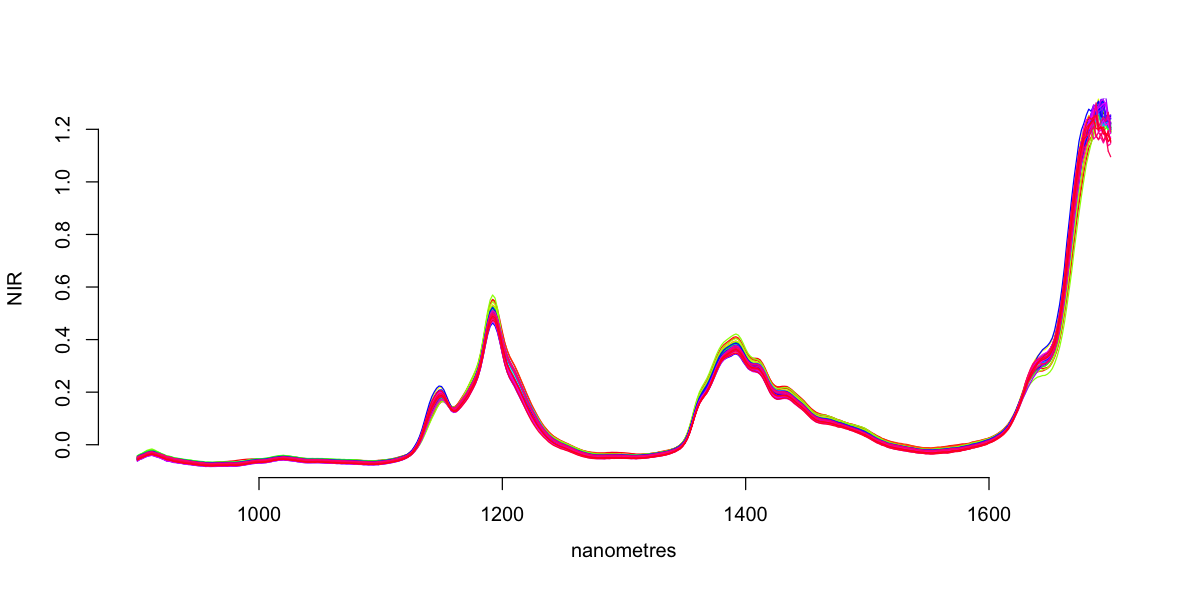

In [86]:
#Plot gas sample according to NIR

#Establish gas samples
nm <- sapply(
    strsplit(substring(colnames(nir),2), ".", fixed=TRUE),
    function(v) as.numeric(v[1]))
    
#Construct plot
plot(nm, nir[1,], type='l', ylab='NIR', bty="n", xlab="")
for(i in 2:60) 
    lines(nm, nir[i,], col=rainbow(60)[i])
mtext(side=1, "nanometres", line=2.5)

In [87]:
### Perform marginal regression

#Step 1
phi <- cor(nir, octane)/apply(nir,2,sd) 

#Step 2
v <- nir%*%phi

#Step 3
fwd <- glm(octane ~ v)

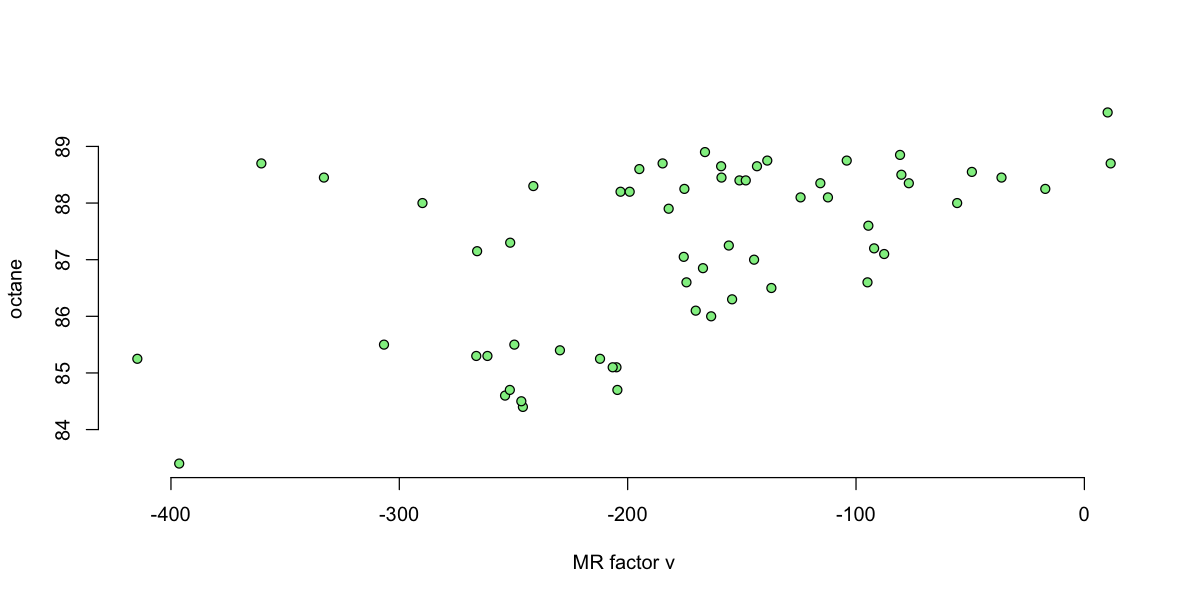

In [88]:
#Plot fitted MR values versus octane
plot(v, octane, pch=21, bg="lightgreen", bty="n", 
    xlab="MR factor v")

### Partial Least Squares (PLS)

In the Partial Least Squares regression, we will iterate the marginal regression by fitting a marginal regression to the residuals of a prior marginal regression. Steps are to
1. Fit an initial marginal regression
2. Calculate residuals from marginal regression $\tilde{y}_{k-1i} = y_i - \hat{y}_{k-1i}$
3. Find the loadings $\phi_k$ such that $\phi_{kj} = {cor}(x_j,\tilde{y}_{k-1})/sd(x_j)$ 
4. Collect fitted values such that $\hat{y}_{ki} = \hat{y}_{k-1i} + \beta_k v_{ki}$ 

#### Run PLS on gasoline example from above. Look to the PLS_gas.R script for the code.